In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

%matplotlib notebook

In [87]:
#Getting data
df = pd.read_csv('Groceries_dataset.csv')
print(len(df))
print(df.isnull().values.any())
df.head()

38765
False


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<IPython.core.display.Javascript object>


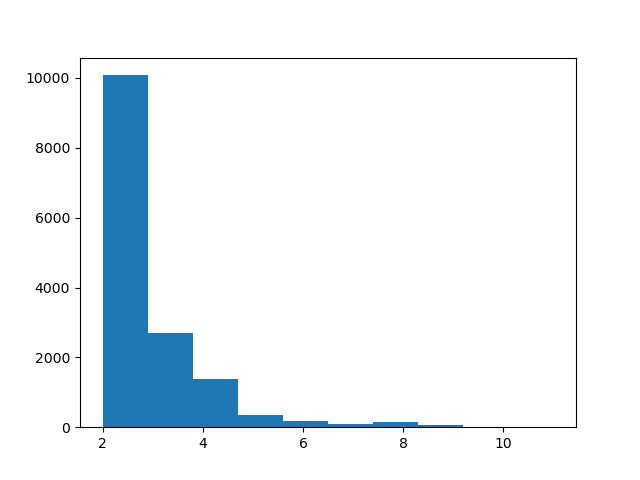

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

In [88]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [89]:
#Preprocessing data
df.itemDescription = df.itemDescription.transform(lambda x: [x])
df = df.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)
df

0        [sausage, whole milk, semi-finished bread, yog...
1                        [whole milk, pastry, salty snack]
2                           [canned beer, misc. beverages]
3                              [sausage, hygiene articles]
4                               [soda, pickled vegetables]
                               ...                        
14958    [tropical fruit, berries, other vegetables, yo...
14959                               [bottled water, herbs]
14960                      [fruit/vegetable juice, onions]
14961         [soda, root vegetables, semi-finished bread]
14962                     [bottled beer, other vegetables]
Name: itemDescription, Length: 14963, dtype: object

In [90]:
#Turning data into iterable list
trans = df.values.tolist()
trans[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [91]:
#Finding rules
rules = list(apriori(trans, min_support = 0.001, min_confidence = 0.001, min_lift = 1.1, min_length = 2))
print(len(rules))
rules[:5]

64


[RelationRecord(items=frozenset({'beef', 'brown bread'}), support=0.0015371249081066632, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'brown bread'}), confidence=0.045275590551181105, lift=1.2033013524286376), OrderedStatistic(items_base=frozenset({'brown bread'}), items_add=frozenset({'beef'}), confidence=0.04085257548845471, lift=1.2033013524286376)]),
 RelationRecord(items=frozenset({'beef', 'curd'}), support=0.0012697988371315912, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'curd'}), confidence=0.03740157480314961, lift=1.110396356705412), OrderedStatistic(items_base=frozenset({'curd'}), items_add=frozenset({'beef'}), confidence=0.037698412698412696, lift=1.1103963567054118)]),
 RelationRecord(items=frozenset({'beef', 'frozen vegetables'}), support=0.0012697988371315912, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'frozen vegetables'}), confidence

In [92]:
#Functtion to list rules in dataframe
def rules_to_df(rules):
    rules_df = pd.DataFrame({'first': [], 'second': [], 'support': [], 'confidence': [], 'lift': []})
    for rule in rules:
        for os in rule.ordered_statistics:
            rules_df.loc[len(rules_df.index)] = [os.items_base, os.items_add, rule.support, os.confidence, os.lift]
    return rules_df

In [93]:
#Rules dataframe
rules_df = rules_to_df(rules)
rul

,first,second,support,confidence,lift
0,(beef),(brown bread),0.001537,0.045276,1.203301
1,(brown bread),(beef),0.001537,0.040853,1.203301
2,(beef),(curd),0.001270,0.037402,1.110396
3,(curd),(beef),0.001270,0.037698,1.110396
4,(beef),(frozen vegetables),0.001270,0.037402,1.335656
...,...,...,...,...,...
137,(whole milk),"(sausage, yogurt)",0.001470,0.009310,1.619866
138,(yogurt),"(sausage, whole milk)",0.001470,0.017121,1.911760
139,"(sausage, whole milk)",(yogurt),0.001470,0.164179,1.911760
140,"(sausage, yogurt)",(whole milk),0.001470,0.255814,1.619866


In [94]:
#Top 10 rules sorted by confidence
Top10 = rules_df.nlargest(10, 'confidence')
Top10.index = np.arange(1, len(Top10) + 1)
Top10

,first,second,support,confidence,lift
1,"(sausage, yogurt)",(whole milk),0.001470,0.255814,1.619866
2,"(sausage, rolls/buns)",(whole milk),0.001136,0.212500,1.345594
3,"(sausage, soda)",(whole milk),0.001069,0.179775,1.138374
4,(semi-finished bread),(whole milk),0.001671,0.176056,1.114825
5,"(sausage, whole milk)",(yogurt),0.001470,0.164179,1.911760
6,(processed cheese),(rolls/buns),0.001470,0.144737,1.315734
7,(packaged fruit/vegetables),(rolls/buns),0.001203,0.141732,1.288421
8,(seasonal products),(rolls/buns),0.001002,0.141509,1.286395
9,"(soda, rolls/buns)",(other vegetables),0.001136,0.140496,1.150651
10,(frankfurter),(other vegetables),0.005146,0.136283,1.116150
